In [ ]:
import torch 

In [ ]:
token1=["he","went","to","the","bank","to","deposit","money"]
tokens2=["they","picnicked","on","the","river","bank"] 

In [ ]:
token1_emb=torch.tensor([
   [0.1, 0.0, 0.0], [0.2, 0.1, 0.0], [0.0, 0.1, 0.0],
   [0.0, 0.0, 0.05],[0.6, 0.6, 0.6 ], [0.0, 0.8, 0.7],
   [0.1, 0.9, 0.8]])

token2_emb=torch.tensor([
[0.08, 0.02, 0.03], [0.5, 0.1, 0.2], [0.02, 0.02, 0.01],
   [0.0, 0.0, 0.05], [0.7, 0.15, 0.5], [0.6, 0.6, 0.6]
 ])


In [ ]:
tokens=["he", "went", "to", "the", "bank", "to", "deposit", "money","they", "picnicked", "on", "the", "river", "bank"]
embeddings=[[0.1, 0.0, 0.0], [0.2, 0.1, 0.0], [0.0, 0.1, 0.0],
   [0.0, 0.0, 0.05], [0.6, 0.6, 0.6], [0.0, 0.8, 0.7],
   [0.1, 0.9, 0.8],[0.08, 0.02, 0.03], [0.5, 0.1, 0.2], [0.02, 0.02, 0.01],
   [0.0, 0.0, 0.05], [0.7, 0.15, 0.5], [0.6, 0.6, 0.6]]

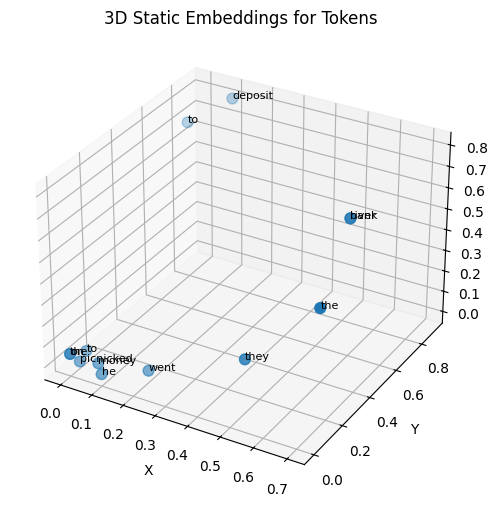

In [7]:
# Re-run after reset: Plot static embeddings in 3D

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# Tokens and embeddings
tokens = ["he", "went", "to", "the", "bank", "to", "deposit", "money",
          "they", "picnicked", "on", "the", "river", "bank"]

embeddings = [
    [0.1, 0.0, 0.0],
    [0.2, 0.1, 0.0],
    [0.0, 0.1, 0.0],
    [0.0, 0.0, 0.05],
    [0.6, 0.6, 0.6],
    [0.0, 0.8, 0.7],
    [0.1, 0.9, 0.8],
    [0.08, 0.02, 0.03],
    [0.5, 0.1, 0.2],
    [0.02, 0.02, 0.01],
    [0.0, 0.0, 0.05],
    [0.7, 0.15, 0.5],
    [0.6, 0.6, 0.6]
]

# Plot in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs, ys, zs = zip(*embeddings)
ax.scatter(xs, ys, zs, s=60)

# Add labels for each token
for token, (x, y, z) in zip(tokens, embeddings):
    ax.text(x, y, z, token, fontsize=8)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("3D Static Embeddings for Tokens")

plt.show()


In [9]:
# contextual for sentence one
from Attentions.context import ContextualCalculation

In [14]:
#attention score

attention =ContextualCalculation(token1_emb)

In [16]:
attention_score=attention.attention_score()

In [33]:
attention_score

tensor([[7.7000e-03, 4.8000e-02, 2.3000e-03, 1.5000e-03, 7.4000e-02, 7.8000e-02],
        [4.8000e-02, 3.0000e-01, 1.4000e-02, 1.0000e-02, 4.6500e-01, 4.8000e-01],
        [2.3000e-03, 1.4000e-02, 9.0000e-04, 5.0000e-04, 2.2000e-02, 3.0000e-02],
        [1.5000e-03, 1.0000e-02, 5.0000e-04, 2.5000e-03, 2.5000e-02, 3.0000e-02],
        [7.4000e-02, 4.6500e-01, 2.2000e-02, 2.5000e-02, 7.6250e-01, 8.1000e-01],
        [7.8000e-02, 4.8000e-01, 3.0000e-02, 3.0000e-02, 8.1000e-01, 1.0800e+00]])

In [17]:
attention_weight=attention.attention_weights(attention_score)

In [18]:
attention_weight

tensor([[0.1422, 0.1436, 0.1408, 0.1408, 0.1495, 0.1408, 0.1422],
        [0.1364, 0.1406, 0.1351, 0.1337, 0.1601, 0.1449, 0.1493],
        [0.1378, 0.1391, 0.1391, 0.1378, 0.1463, 0.1492, 0.1507],
        [0.1407, 0.1407, 0.1407, 0.1410, 0.1449, 0.1457, 0.1464],
        [0.0836, 0.0943, 0.0836, 0.0811, 0.2319, 0.1937, 0.2319],
        [0.0749, 0.0811, 0.0811, 0.0776, 0.1842, 0.2318, 0.2693],
        [0.0669, 0.0739, 0.0724, 0.0689, 0.1949, 0.2381, 0.2850]])

In [19]:
#contextual embedding 
context=attention.contextualvlaues(attention_weight)



In [ ]:
context 

tensor([[0.1469, 0.3588, 0.3091],
        [0.1527, 0.3738, 0.3236],
        [0.1444, 0.3706, 0.3197],
        [0.1438, 0.3634, 0.3131],
        [0.1895, 0.5205, 0.4642],
        [0.1612, 0.5546, 0.4921],
        [0.1669, 0.5785, 0.5150]])

In [ ]:
context_token1=[[0.1469, 0.3588, 0.3091],
        [0.1527, 0.3738, 0.3236],
        [0.1444, 0.3706, 0.3197],
        [0.1438, 0.3634, 0.3131],
        [0.1895, 0.5205, 0.4642],
        [0.1612, 0.5546, 0.4921],
        [0.1669, 0.5785, 0.5150]]

context_token2=[
    [0.3261, 0.1536, 0.2392],
        [0.3752, 0.1815, 0.2788],
        [0.3198, 0.1504, 0.2343],
        [0.3198, 0.1504, 0.2344],
        [0.4119, 0.2055, 0.3110],
        [0.4277, 0.2319, 0.3325]
]

In [21]:
sentence2=ContextualCalculation(token2_emb)

In [22]:
attention_score=sentence2.attention_score()

In [ ]:
attention_score 

tensor([[7.7000e-03, 4.8000e-02, 2.3000e-03, 1.5000e-03, 7.4000e-02, 7.8000e-02],
        [4.8000e-02, 3.0000e-01, 1.4000e-02, 1.0000e-02, 4.6500e-01, 4.8000e-01],
        [2.3000e-03, 1.4000e-02, 9.0000e-04, 5.0000e-04, 2.2000e-02, 3.0000e-02],
        [1.5000e-03, 1.0000e-02, 5.0000e-04, 2.5000e-03, 2.5000e-02, 3.0000e-02],
        [7.4000e-02, 4.6500e-01, 2.2000e-02, 2.5000e-02, 7.6250e-01, 8.1000e-01],
        [7.8000e-02, 4.8000e-01, 3.0000e-02, 3.0000e-02, 8.1000e-01, 1.0800e+00]])

In [24]:
attention_weigts=sentence2.attention_weights(attention_score)

In [26]:
attention_weigts

tensor([[0.1621, 0.1687, 0.1612, 0.1610, 0.1732, 0.1739],
        [0.1375, 0.1769, 0.1329, 0.1324, 0.2086, 0.2118],
        [0.1651, 0.1671, 0.1649, 0.1648, 0.1684, 0.1697],
        [0.1650, 0.1664, 0.1648, 0.1651, 0.1689, 0.1698],
        [0.1182, 0.1748, 0.1122, 0.1126, 0.2354, 0.2468],
        [0.1086, 0.1624, 0.1036, 0.1036, 0.2259, 0.2959]])

In [30]:
context2=sentence2.contextualvlaues(attention_weigts)

In [ ]:
context2 

tensor([[0.3261, 0.1536, 0.2392],
        [0.3752, 0.1815, 0.2788],
        [0.3198, 0.1504, 0.2343],
        [0.3198, 0.1504, 0.2344],
        [0.4119, 0.2055, 0.3110],
        [0.4277, 0.2319, 0.3325]])

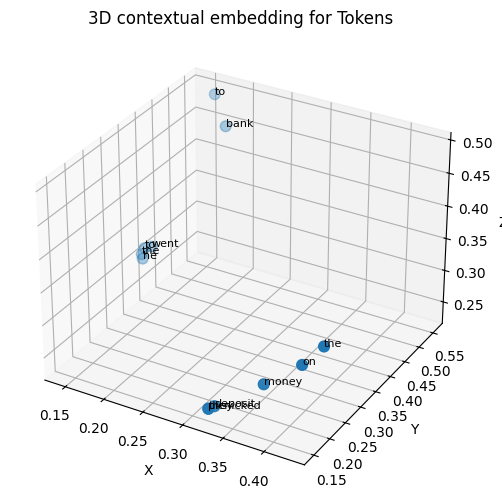

In [1]:
context_token1=[[0.1469, 0.3588, 0.3091],
        [0.1527, 0.3738, 0.3236],
        [0.1444, 0.3706, 0.3197],
        [0.1438, 0.3634, 0.3131],
        [0.1895, 0.5205, 0.4642],
        [0.1612, 0.5546, 0.4921],
        [0.1669, 0.5785, 0.5150]]

context_token2=[
    [0.3261, 0.1536, 0.2392],
        [0.3752, 0.1815, 0.2788],
        [0.3198, 0.1504, 0.2343],
        [0.3198, 0.1504, 0.2344],
        [0.4119, 0.2055, 0.3110],
        [0.4277, 0.2319, 0.3325]
]


# Re-run after reset: Plot static embeddings in 3D

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# Tokens and embeddings
tokens = ["he", "went", "to", "the", "bank", "to", "deposit", "money",
          "they", "picnicked", "on", "the", "river", "bank"]

embeddings = [
    [0.1469, 0.3588, 0.3091],
        [0.1527, 0.3738, 0.3236],
        [0.1444, 0.3706, 0.3197],
        [0.1438, 0.3634, 0.3131],
        [0.1895, 0.5205, 0.4642],
        [0.1612, 0.5546, 0.4921],
        [0.3261, 0.1536, 0.2392],
        [0.3752, 0.1815, 0.2788],
        [0.3198, 0.1504, 0.2343],
        [0.3198, 0.1504, 0.2344],
        [0.4119, 0.2055, 0.3110],
        [0.4277, 0.2319, 0.3325]
]


# Plot in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs, ys, zs = zip(*embeddings)
ax.scatter(xs, ys, zs, s=60)

# Add labels for each token
for token, (x, y, z) in zip(tokens, embeddings):
    ax.text(x, y, z, token, fontsize=8)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("3D contextual embedding for Tokens") 

plt.show() 
